# Exercise 9: Integration Schemes

## 9.1 Exercise: Harmonic Oscillators
Euler integrator:
$$
p(t + \Delta t) = p(t) - x(t) \Delta t \\
x(t +\Delta t) = x(t) + p(t) \Delta t
$$

second integrator:

$$
p(t + \Delta t) = p(t) - x(t) \Delta t \\
x(t +\Delta t) = x(t) + p(t + \Delta t) \Delta t
$$

#### a) Expressing the integrators in Matrix form:

$$
\begin{pmatrix}
x \\ p
\end{pmatrix}_{t+\Delta t} 
= M \times \begin{pmatrix}
x \\ p
\end{pmatrix}_{t} \tag{1}
$$

For the Euler integrator:
$$ M_{1} = \begin{bmatrix}
1 & \Delta t \\
-\Delta t & 1 \\
\end{bmatrix}
$$
and for the determinant of $M_1$:
$$ det[M_1] =
\begin{vmatrix}
1 & \Delta t \\
-\Delta t & 1 \\
\end{vmatrix} = 1 + (\Delta t)² \geqq 1
$$

This is a clear sign it is not a symplectic Matrix, and thus not a symplectic integration method.

For the symplectic Euler integrator:
$$ M_{2} = \begin{bmatrix}
1- (\Delta t)² & \Delta t \\
-\Delta t & 1 \\
\end{bmatrix}
$$
and for the determinant of $M_1$:
$$ det[M_2] =
\begin{vmatrix}
1 - (\Delta t)² & \Delta t \\
-\Delta t & 1 \\
\end{vmatrix} = 1 - (\Delta t)² + (\Delta t)² = 1
$$
#### b) show that the Shadow Hamiltonian is conserved

the shadow Hamiltonian at a time $t$ is defined by 
$$
H'_t = H_t - \frac{p \ x  \ \Delta t}{2} = \frac{p²}{2} + \frac{x²}{2} - \frac{p \ x  \ \Delta t}{2}
$$

after a time step $\Delta t$ :
$$
2 \ H'_{t+ \Delta t}  = p²(t+\Delta t) + x²(t+\Delta t) + x(t+\Delta t) \ p(t+\Delta t) \Delta t \\

= \underline{p² }-2px\Delta t +x²\Delta t² + \underline{x²}-2x²\Delta t² +\Delta t⁴x² + 2x p \Delta t - 2\Delta t³ x p +p² \Delta t² \ \underline{-px\Delta t }+ x²\Delta t² +px\Delta t³ -x² \Delta t4 -p²\Delta t² +xp\Delta t³ \\
= 2 H'_t

$$
where in the second line, all terms that are not underlined cancel each other out exactly, they appear twice with opposite signs.
This means that any integration step leaves the shadow hamiltonian unchanged.






In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import csv
data = []
with open('Intgeration_Data.csv') as csvfile:
    contents= csv.reader(csvfile, delimiter=";")
    #next(contents)#skip header line
    for row in contents:
        data.append(np.asarray(row).astype('double'))
t_small=data[0]
euler_small=data[1:5]
symplectic_small=data[5:10]
t_big= data[10]

euler_big= data[11:15]
symplectic_big=data[15:20]
velocity_verlet=data[20:24]
verlet=data[24:28]
test_vel_verlet=data[28:34]
test_vel_verlet2=data[34:]
print(len(data))


46


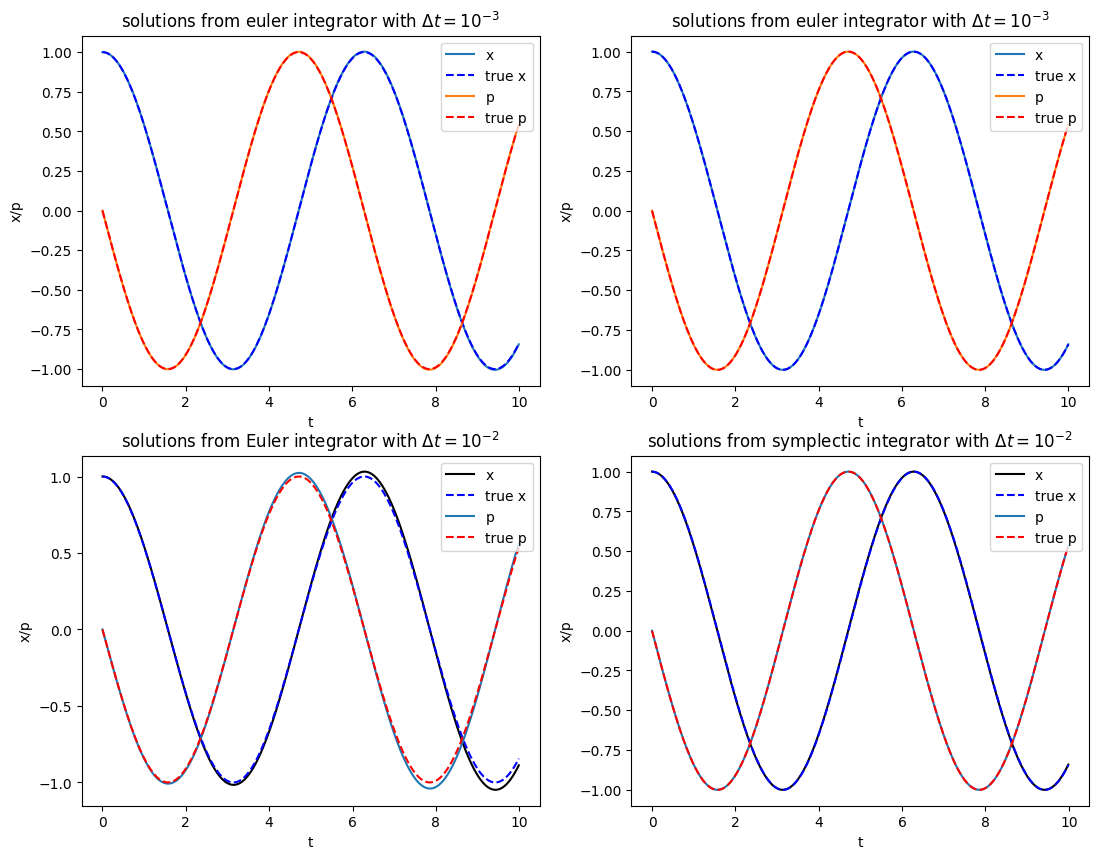

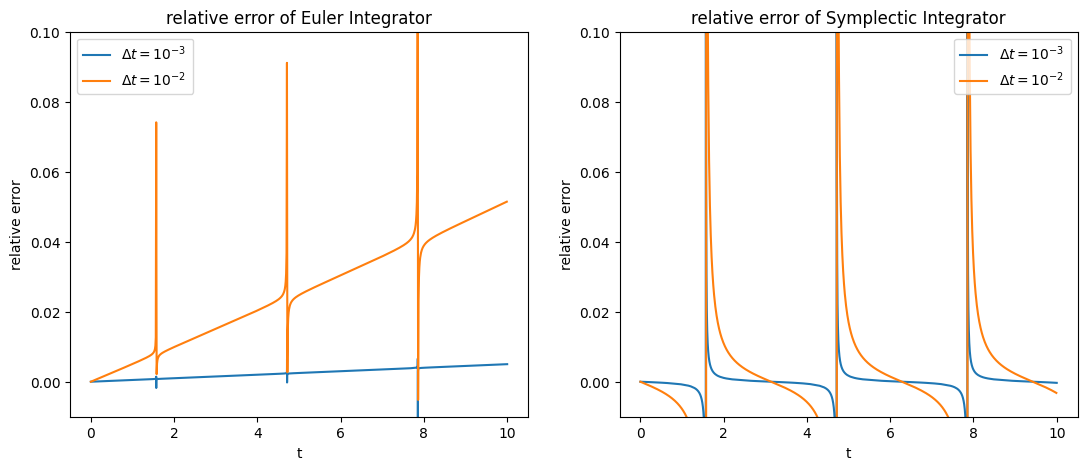

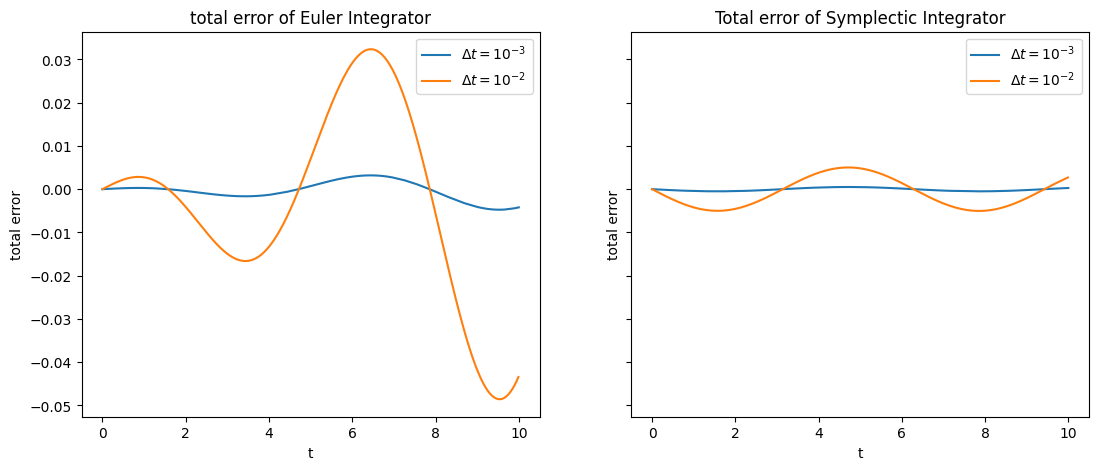

In [9]:
fig, axs = plt.subplots(2,2,figsize=(13,10))

axs[0][0].set_title("solutions from euler integrator with $\Delta t = 10^{-3}$")
axs[0][0].plot(t_small,euler_small[0], label="x")
axs[0][0].plot(t_small,np.cos(t_small), color="blue", linestyle= "--",label="true x")
axs[0][0].plot(t_small, euler_small[1],label= "p")
axs[0][0].plot(t_small, -np.sin(t_small), color="red", linestyle="--",label = "true p")
axs[0][0].set_ylabel("x/p")
axs[0][0].set_xlabel("t")
axs[0][0].legend()

axs[0][1].set_title("solutions from euler integrator with $\Delta t = 10^{-3}$")
axs[0][1].plot(t_small,symplectic_small[0], label="x")
axs[0][1].plot(t_small,np.cos(t_small), color="blue", linestyle= "--",label="true x")
axs[0][1].plot(t_small, symplectic_small[1],label= "p")
axs[0][1].plot(t_small, -np.sin(t_small), color="red", linestyle="--",label = "true p")
axs[0][1].set_ylabel("x/p")
axs[0][1].set_xlabel("t")
axs[0][1].legend()

axs[1][0].set_title("solutions from Euler integrator with $\Delta t = 10^{-2}$")
axs[1][0].plot(t_big,euler_big[0], color="black",label="x")
axs[1][0].plot(t_big,np.cos(t_big), color="blue", linestyle= "--",label="true x")
axs[1][0].plot(t_big, euler_big[1],label= "p")
axs[1][0].plot(t_big, -np.sin(t_big), color="red", linestyle="--",label = "true p")
axs[1][0].set_ylabel("x/p")
axs[1][0].set_xlabel("t")
axs[1][0].legend()


axs[1][1].set_title("solutions from symplectic integrator with $\Delta t = 10^{-2}$")
axs[1][1].plot(t_big,symplectic_big[0],color="black", label="x")
axs[1][1].plot(t_big,np.cos(t_big), color="blue", linestyle= "--",label="true x")
axs[1][1].plot(t_big, symplectic_big[1],label= "p")
axs[1][1].plot(t_big, -np.sin(t_big), color="red", linestyle="--",label = "true p")
axs[1][1].set_ylabel("x/p")
axs[1][1].set_xlabel("t")
axs[1][1].legend()

fig,axs = plt.subplots(1,2,figsize=(13,5))
axs[0].set_title("relative error of Euler Integrator")
axs[0].plot(t_small,euler_small[2], label="$\Delta t = 10^{-3}$ ")
axs[0].plot(t_big,euler_big[2], label="$\Delta t = 10^{-2}$ ")
axs[0].set_ylabel("relative error")
axs[0].set_xlabel("t")
axs[0].set_ylim(-0.01,0.1)
axs[0].legend()

axs[1].set_title("relative error of Symplectic Integrator")
axs[1].plot(t_small,symplectic_small[2], label="$\Delta t = 10^{-3}$ ")
axs[1].plot(t_big,symplectic_big[2], label="$\Delta t = 10^{-2}$ ")
axs[1].set_ylabel("relative error")
axs[1].set_xlabel("t")
axs[1].set_ylim(-0.01,0.1)
axs[1].legend()

fig,axs = plt.subplots(1,2,figsize=(13,5),sharey=True)
axs[0].set_title("total error of Euler Integrator")
axs[0].plot(t_small,euler_small[2]*np.cos(t_small), label="$\Delta t = 10^{-3}$ ")
axs[0].plot(t_big,euler_big[2]*np.cos(t_big), label="$\Delta t = 10^{-2}$ ")
axs[0].set_ylabel("total error")
axs[0].set_xlabel("t")

axs[0].legend()

axs[1].set_title("Total error of Symplectic Integrator")
axs[1].plot(t_small,symplectic_small[2]*np.cos(t_small), label="$\Delta t = 10^{-3}$ ")
axs[1].plot(t_big,symplectic_big[2]*np.cos(t_big), label="$\Delta t = 10^{-2}$ ")
axs[1].set_ylabel("total error")
axs[1].set_xlabel("t")

axs[1].legend()

plt.show()

- first figure with all the trajectories: for small step size both look okay, but for big step size the euler shows already clear visible deviations from the trajectory

- second figure relative error: dashes whenever small numbers occur, for euler, relative error grows linearly over the course of the simulation, with very narrow spikes when small values occur

- for symplectic: at first glance looks much worse, spikes much higher
- shows periodic behaviour without strong linear growth underneath, increasing the stepsize simply means broadening the spike in relative error around small values
- still no underlying growth over time

- total error: euler generally bigger total error, escalates over time, 10 fold decrease in step size seems to lead to 10fold increase of the error
- symplectic: total error fluctuates slighlty around 0, but amplitude seems to be remaining roughly constant on this time scale

in summation, for most applications symplectic euler is much nicer than regular, as it seems much more stable over time, and has a lower total error.
When the simulation time is short,timesteps are very small, and a high degree of accuracy for small values is required, the regular euler might be a better choice as the relative error is less problematic close to zero.



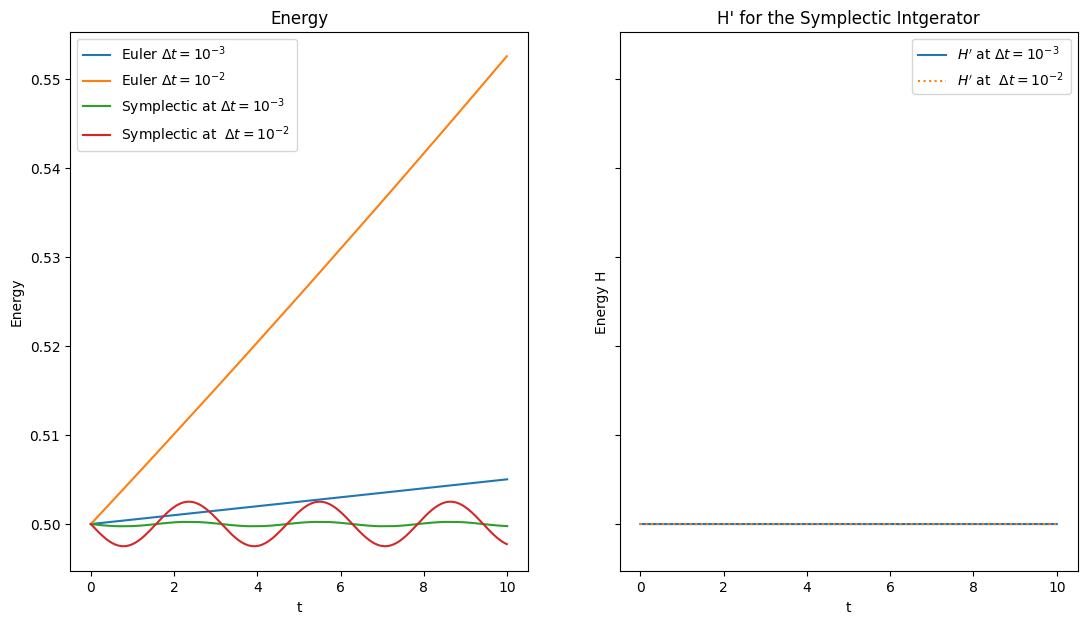

In [10]:

fig,axs = plt.subplots(1,  2,figsize=(13,7),sharey=True)
axs[0].set_title("Energy")
axs[0].plot(t_small,euler_small[3], label="Euler $ \Delta t = 10^{-3}$ ")
axs[0].plot(t_big,euler_big[3], label="Euler $\Delta t = 10^{-2}$ ")
axs[0].set_ylabel("Energy")
axs[0].set_xlabel("t")

axs[0].plot(t_small,symplectic_small[3], label="Symplectic at $ \Delta t = 10^{-3}$ ")
axs[0].plot(t_big,symplectic_big[3], label="Symplectic at  $\Delta t = 10^{-2}$ ")
axs[1].plot(t_small,symplectic_small[4],label="$H'$ at $ \Delta t = 10^{-3}$ ")
axs[1].plot(t_big,symplectic_big[4],linestyle = ":", label="$H'$ at  $\Delta t = 10^{-2}$ ")
axs[1].set_ylabel("Energy H")
axs[1].legend()
axs[1].set_title("H' for the Symplectic Intgerator")
axs[1].set_xlabel("t")


axs[0].legend()
plt.show()


For the regular Euler Intgerator one can see a strong energy drift, that grows in magnitude together with the increase of the integration timestep. The Energy of the symplectic integration fluctuates periodicly around the true value of $ H = 0.5$ with a constant seeming amplitude. This is much nicer behaviour when one wants to integrate trajectories accurately over time.
In the plot on the left, one can see clearly that allthough there are periodic fluctuations in the Hamiltonian, the Shadow Hamiltonian is perfectly conserved during the simulation with the symplectic algorithm, even for a larger timestep.

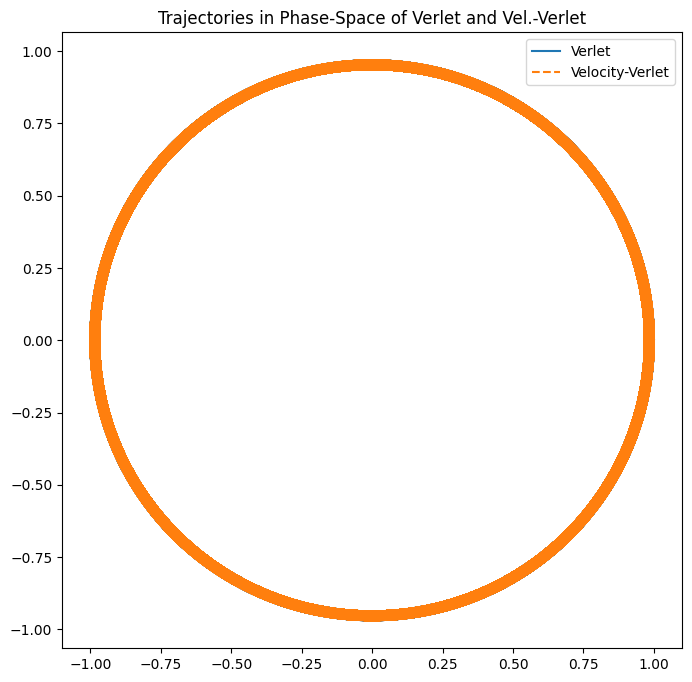

In [11]:



fig,axs= plt.subplots(1,1,figsize=(8,8))

#plt.scatter(t_big,(velocity_verlet[3]-velocity_verlet[3][0])/velocity_verlet[3][0], marker=".")
plt.plot(verlet[0],verlet[1],label = "Verlet")
plt.plot(velocity_verlet[0],velocity_verlet[1], label= "Velocity-Verlet", linestyle="--")
plt.title("Trajectories in Phase-Space of Verlet and Vel.-Verlet")
plt.legend()
plt.show()

0.01104894488327534


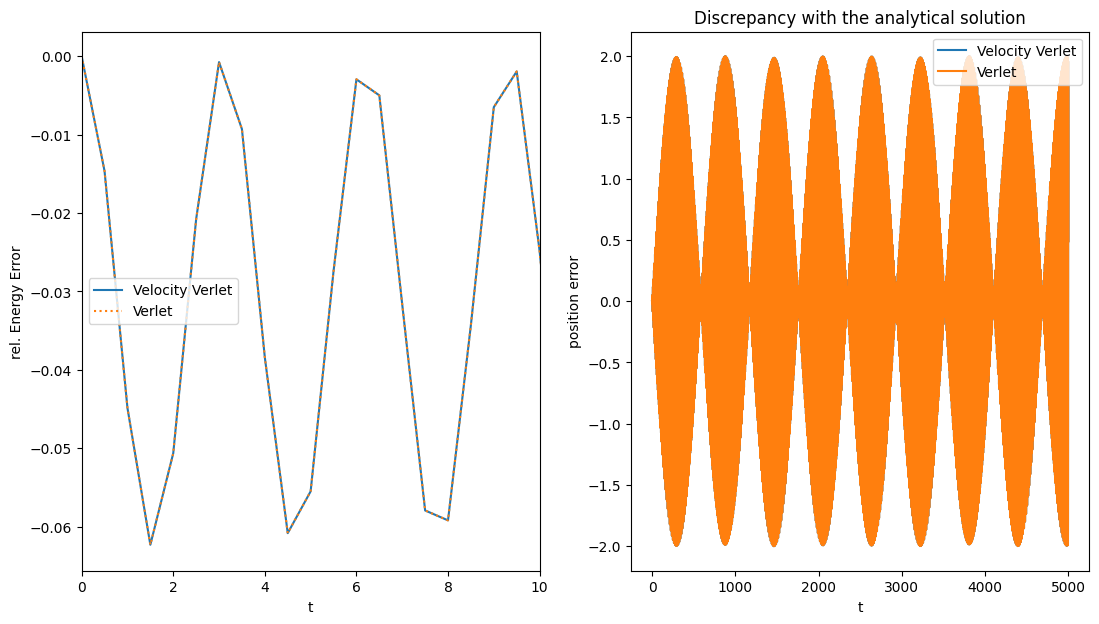

In [20]:
N_big=10000
t_big=np.arange(0,N_big*0.5, 0.5)

E_err_vel_verlet= (velocity_verlet[3]-0.5)/velocity_verlet[3][0]
print(np.std(velocity_verlet[3]))
E_err_verlet= (verlet[3]-verlet[3][0])/verlet[3][0]
fig,axs = plt.subplots(1,  2,figsize=(13,7))
#axs[0].set_title("Energy Conservation")
#axs[0].plot(t_big[9500:],E_err_verlet[9500:],linestyle="-" ,label="Verlet")
#axs[0].plot(t_big[9500:],E_err_vel_verlet[9500:],linestyle=":" ,label="Verlet")
axs[0].plot(t_big,E_err_vel_verlet,label="Velocity Verlet")
axs[0].plot(t_big,E_err_verlet,label="Verlet", linestyle=":")
axs[0].set_ylabel("rel. Energy Error")
axs[0].set_xlabel("t")
axs[0].set_xlim(0,10)
axs[0].legend()

axs[1].plot(t_big,velocity_verlet[2],label="Velocity Verlet")
axs[1].plot(t_big,verlet[2],label="Verlet")

axs[1].set_ylabel("position error")
axs[1].legend()
axs[1].set_title("Discrepancy with the analytical solution")
axs[1].set_xlabel("t")


plt.show()


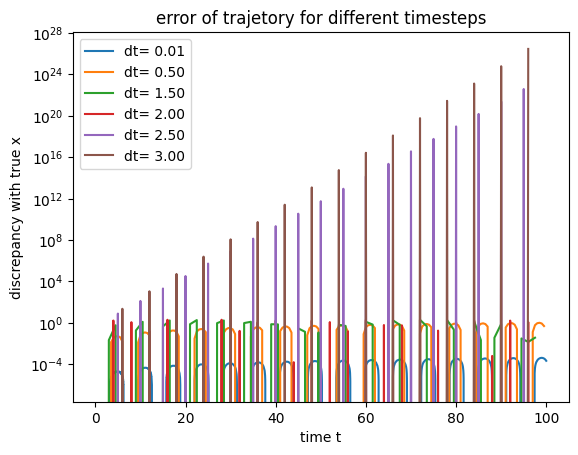

In [13]:
dt_test=np.array([0.01,0.5,1.5,2,2.5,3])
plt.yscale("log")
plt.title("error of trajetory for different timesteps")
for i, dt in enumerate( dt_test):
    times=np.arange(0,100,dt)
    length= int(100/dt)
    
    plt.plot(times[0:length],test_vel_verlet[i][0:length],label="dt= %.2f"%(dt))
plt.xlabel("time t")
plt.legend()
plt.ylabel("discrepancy with true x")
plt.show()





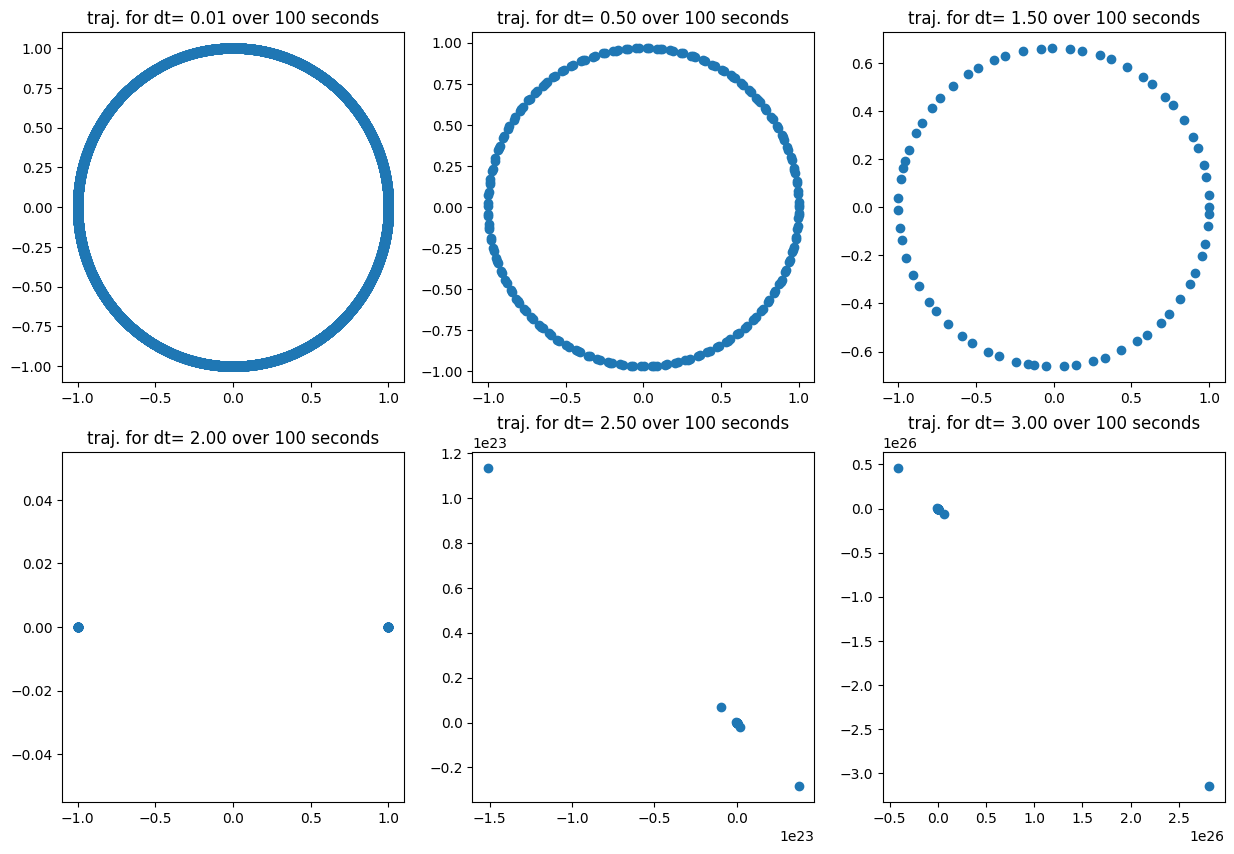

In [14]:
fig, axs= plt.subplots(2,3,figsize= (15,10))
for i,ax in enumerate(axs.flatten()):
    length= int(100/dt_test[i])
    ax.set_title("traj. for dt= %.2f over 100 seconds"%(dt_test[i]))
    ax.scatter(test_vel_verlet2[2*i][0:length],test_vel_verlet2[2*i+1][0:length])
